#### 统计年度与季度GDP
利用TuShare接口，获取近5年的GDP信息，绘制柱状图。再抓取这5年的单季度GDP，绘制折线图。要求两张图片绘制在同一窗口的不同子图中，上下分布或者左右分布均可。折线图中要求以实心点表示数据，以虚线连接。在这个练习中，我们会接触到一些简单地关于matplotlib的操作，主要是简单的柱状图的绘制，以及划分子图的操作。

In [39]:
# coding:utf8
import tushare as ts
import numpy as np

In [40]:
ts.set_token('********')
pro = ts.pro_api()
df = pro.cn_gdp()
df

,quarter,gdp,gdp_yoy,pi,pi_yoy,si,si_yoy,ti,ti_yoy
0,2019Q4,990865.1,6.1,70466.7,3.1,386165.3,5.7,534233.1,6.9
1,2019Q3,712845.4,6.2,43005.0,2.9,276912.5,5.6,392927.9,7.0
2,2019Q2,460636.7,6.3,23207.0,3.0,179122.1,5.8,258307.5,7.0
3,2019Q1,218062.8,6.4,8769.4,2.7,81806.5,6.1,127486.9,7.0
4,2018Q4,900309.5,6.6,64734.0,3.5,366000.9,5.8,469574.6,7.6
...,...,...,...,...,...,...,...,...,...
147,1956Q4,1028.0,15.0,443.9,4.7,280.7,34.5,303.4,14.1
148,1955Q4,910.0,6.8,421.0,7.9,222.2,7.6,266.8,4.6
149,1954Q4,859.0,4.2,392.0,1.7,211.7,15.7,255.3,-0.6
150,1953Q4,824.0,15.6,378.0,1.9,192.5,35.8,253.5,27.3


In [49]:
gdp_year = df[df['quarter'].str.contains('Q4')].iloc[:,0:2].head()
gdp_year = gdp_year[::-1]
gdp_year

,quarter,gdp
16,2015Q4,685992.9
12,2016Q4,740060.8
8,2017Q4,820754.3
4,2018Q4,900309.5
0,2019Q4,990865.1


In [50]:
gdp_quarter = df.head(20).iloc[:,0:2]
gdp_quarter

,quarter,gdp
0,2019Q4,990865.1
1,2019Q3,712845.4
2,2019Q2,460636.7
3,2019Q1,218062.8
4,2018Q4,900309.5
5,2018Q3,646710.9
6,2018Q2,417215.4
7,2018Q1,197920.0
8,2017Q4,820754.3
9,2017Q3,588405.3


In [160]:
year_data_x = [i.split('Q')[0] for i in gdp_year.quarter.tolist()]
year_data_y = gdp_year.gdp.tolist()
quarter_data_n = [i.split('Q')[0] for i in np.array(gdp_quarter.quarter[::-4])]
quarter_data_q = np.array([i.split('Q')[1] for i in (gdp_quarter.quarter[::-1])]).reshape(5,4)
quarter_data_y = np.array(gdp_quarter.gdp[::-1]).reshape(5,4)
new_lst = []
for lst in quarter_data_y:
    t_lst = []
    first_num = 0
    for i in lst:
        j = i - first_num 
        t_lst.append(j)
        first_num = i
    new_lst.append(t_lst)
quarter_data_y = new_lst

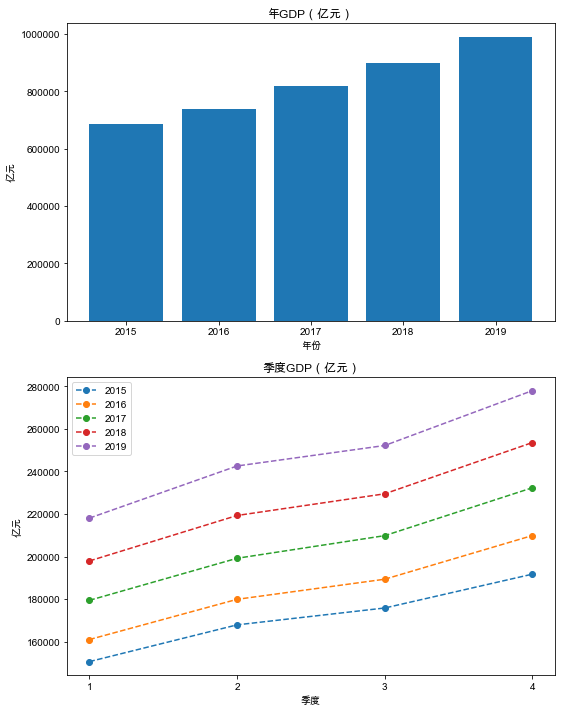

In [193]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,10),edgecolor='black',frameon=True)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
ax = fig.add_subplot(2,1,1)
ax.set_ylabel('亿元')
ax.set_xlabel('年份')
ax.set_title('年GDP（亿元）')
plt.tight_layout()
ax.bar(year_data_x,year_data_y)

bx = fig.add_subplot(2,1,2)
bx.set_ylabel('亿元')
bx.set_xlabel('季度')
bx.set_title('季度GDP（亿元）')

plt.tight_layout()
for t,m,n in zip(quarter_data_n,quarter_data_q,quarter_data_y):
    bx.plot(m,n,linestyle='dashed',marker='o',label=t)

bx.legend(loc="upper left")
plt.show()

In [195]:
# fig,ax = plt.subplots(1,2,gridspec_kw={'width_ratios': [3, 1]})

# ax[0].set_ylabel('hundred million')
# ax[0].set_xlabel('year')
# ax[0].set_title('year-gdp')
# plt.tight_layout()
# ax[0].bar(year_data_x,year_data_y)

# ax[1].set_ylabel('hundred million')
# ax[1].set_xlabel('quarter')
# ax[1].set_title('quarter-gdp')

# plt.tight_layout()
# for t,m,n in zip(quarter_data_n,quarter_data_q,quarter_data_y):
#     ax[1].plot(m,n,linestyle='dashed',marker='o',label=t)

# ax[1].legend(loc="upper left")
# plt.show()

https://crossincode.com/oj/project/138/

##### 为后续绘图方便，整理数据
```
years.reverse()
year_gdps.reverse()
quarters.reverse()
quarter_gdps.reverse()
```

##### 季度的GDP是累计的，到第四季度时记录就是全年的GDP，为了绘制单季度的曲线，对数据进行处理
```
quarter_copy = quarter_gdps.copy()
for i in range(len(quarter_gdps)):
    if i % 4 != 0:
        quarter_gdps[i] -= quarter_copy[i-1]
```